### An Analysis on Salary Data using ANOVA technique
ANOVA is a technique which belongs to the domain called “Experimental Designs”. It helps in establishing in an exact way, the Cause- Effect relation between variables. From the statistical inference point of view, ANOVA is an extension of independent t test for testing the equality of two population means. When more than two population means have to be compared, ANOVA technique is used. In this case, the null hypothesis( H0) is defined as

H 0 : µ 1 = µ 2 =µ 3 =µ 4 =……=µ k for testing the equality of population means for k populations where µ denotes the mean of the population.

In this work, an analysis of salary data has been performed and the results and business insights drawn are listed.

# Problem 1A:
### Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

# SALARY DATA (ONE-WAY ANONA)

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats.multicomp import pairwise_tukeyhsd,MultiComparison
from sklearn.decomposition import PCA

## Loading the dataset CSV files

In [74]:
df = pd.read_csv('SalaryData.csv')


## Checking the top 10 Records

In [71]:
df.head(10)

Education       Occupation  Salary
0   Doctorate     Adm-clerical  153197
1   Doctorate     Adm-clerical  115945
2   Doctorate     Adm-clerical  175935
3   Doctorate     Adm-clerical  220754
4   Doctorate            Sales  170769
5   Doctorate            Sales  219420
6   Doctorate            Sales  237920
7   Doctorate            Sales  160540
8   Doctorate            Sales  180934
9   Doctorate   Prof-specialty  248156

## Checking the shape and information of the dataframe

In [75]:
df.shape

(40, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


## Checking the summary of the dataframe

In [6]:
df.describe(include='all')

Education       Occupation         Salary
count           40               40      40.000000
unique           3                4            NaN
top      Doctorate   Prof-specialty            NaN
freq            16               13            NaN
mean           NaN              NaN  162186.875000
std            NaN              NaN   64860.407506
min            NaN              NaN   50103.000000
25%            NaN              NaN   99897.500000
50%            NaN              NaN  169100.000000
75%            NaN              NaN  214440.750000
max            NaN              NaN  260151.000000

## Checking distinct values of Education and Occupation

In [7]:
df.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [8]:
df.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

# 1. State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

## One Way Anova ( Education)

In [9]:
df['Education'].describe().T

count             40
unique             3
top        Doctorate
freq              16
Name: Education, dtype: object

## Null Hypothesis and Alternative Hypothesis ( For Education):

### Null Hypothesis 𝐻0: The mean salary is the same across all the 3 categories of education (Doctorate, Bachelors, HS-Grad).

### Alternate Hypothesis 𝐻1: The mean salary is different in at least one category of education.

# One Way Anova ( Occupation)


In [10]:
df['Occupation'].describe().T

count                  40
unique                  4
top        Prof-specialty
freq                   13
Name: Occupation, dtype: object

## Null Hypothesis and Alternative Hypothesis( For Occupation):

###  Null Hypothesis 𝐻0: The mean salary is the same across all the 4 categories of occupation(Prof-Specialty, Sales, Adm-clerical, Exec-Managerial).
### Alternate Hypothesis 𝐻1: The mean salary is different in at least one category of occupation.

# 2. Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [11]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


#### The above is the ANOVA table for Education variable.
For the given problem sum of squares due to the factor Education (SSB) is 1.026955e+11 and the sum of  squares  due  to  error  (SSW)  is 6.137256e+10 .  The total  sum  of  squares(SST)  for  the  data is (1026955+6137256=7164211).Since the factor has 3 levels, DF corresponding to Education is 3 – 1 = 2. Total DF is 40 –1 = 39. Hence DF due to error is 39 –2 = 37.Mean sum of squares is obtained by dividing the sums of squares by corresponding DF. The value of the F-statistic is approximately 30.95 or 31 and the p-value is highly significant.

## Conclusion:
### Since the p value = 1.257709e-08 is less than the significance level (alpha = 0.05), we can reject the null hypothesis and conclude that there is a significant difference in the mean salaries for at least one category of education.

# 3. Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [12]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


#### The above is the ANOVA table for Occupation variable.

For the given problem sum of squares due to the factor Education (SSB) is 1.125878e+10  and the sum of squares due to error (SSW) is 1.528092e+11 . The total sum of squares(SST) for the data is (1125878+1528092=2653970)e+11 approximately.Since the factor has 4 levels, DF corresponding to Occupation is 4 – 1 = 3. Total DF is 40 –1 = 39. Hence DF due to error is 39 –3 = 36. Mean sum of squares is obtained by dividing the sums of squares by corresponding DF. The value of the F-statistic is approximately 30.95 or 31 and the p-value is highly significant.


## Conclusion:
### Since the p value = 0.458508 is greater than the significance level (alpha = 0.05), we fail to reject the null hypothesis (i.e. we accept H0) and conclude that there is no significant difference in the mean salaries across the 4 categories of occupation.

### Drawing a Point Plot ( For both Education and Occupation with Salary)

<AxesSubplot:xlabel='Education', ylabel='Salary'>

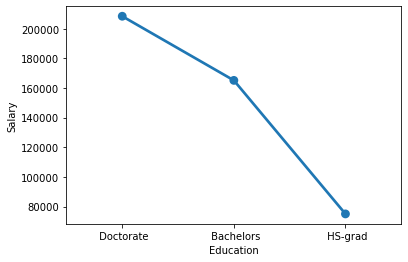

In [13]:
sns.pointplot(x='Education', y='Salary', data=df, ci=None)

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

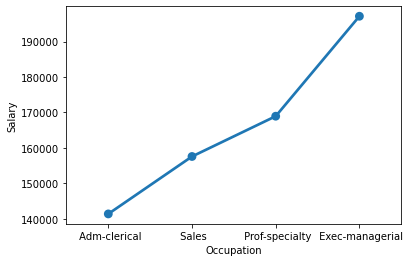

In [79]:
sns.pointplot(x='Occupation', y='Salary', data=df, ci=None)

We have observed that Education and Occupation individually have a significant impact on Salary  as  null  hypotheses that  group  means  are  equal  have been  rejected  in  one case and accepted in the other case. However, we have not been able to determine which mean is different from the rest or whether all pairs of means are different.There are special tests (called post hoctests)of the differences between all pairs of means. These tests are also called multiple comparison tests. 

# 4. If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result.

A one-way ANOVA is used to determine whether or not there is a statistically significant difference between the means of three or more independent groups.

If the overall p-value from the ANOVA table is less than some significance level, then we have sufficient evidence to say that at least one of the means of the groups is different from the others.

However, this doesn’t tell us which groups are different from each other. It simply tells us that not all of the group means are equal. In order to find out exactly which groups are different from each other, we must conduct a post hoc test.

One of the most commonly used post hoc tests is Tukey’s Test, which allows us to make pairwise comparisons between the means of each group 

### Multiple comparison tests for Education: 

In order to identify for which Education, the salary group means are different from other groups,the hypotheses may be stated as:

𝐻0: All pairs of group means are equal.

𝐻𝑎: At least one group mean is different from the rest.


In [15]:
# Posthoc test: Tukey test
MultiComp=MultiComparison(df['Salary'],df['Education'])
print(MultiComp.tukeyhsd().summary())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


### Observation :

The table shows that since the p- values(p-adj in the table) are lesser than the significance level for all the three categories of education, this implies that the mean salaries across all categories of education are different.

### Multiple comparison tests for Occupation :

In [16]:
MultiComp=MultiComparison(df['Salary'],df['Occupation'])
print(MultiComp.tukeyhsd().summary())

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1           group2        meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------------------
    Adm-clerical  Exec-managerial     55693.3 0.4146  -40415.1459 151801.7459  False
    Adm-clerical   Prof-specialty  27528.8538 0.7252  -46277.4011 101335.1088  False
    Adm-clerical            Sales  16180.1167    0.9  -58951.3115  91311.5449  False
 Exec-managerial   Prof-specialty -28164.4462 0.8263 -120502.4542  64173.5618  False
 Exec-managerial            Sales -39513.1833 0.6507 -132913.8041  53887.4374  False
  Prof-specialty            Sales -11348.7372    0.9  -81592.6398  58895.1655  False
------------------------------------------------------------------------------------


### Observations :
For the category occupation, the Tukey Honest Significant Difference test has further confirmed that the mean salaries across all occupation classes are significantly same. We can observe that all p-values are greater than 0.05.

# Problem 1B:

### 1. What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

We analyze the effects of one variable on the other (Education and Occupation) with the help of an point plot.

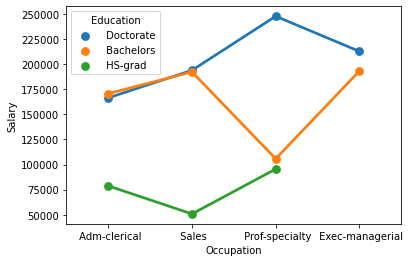

In [17]:
sns.pointplot(x='Occupation', y='Salary', data=df, hue='Education',ci=None);

The interaction plot shows that there is significant amount of interaction between the categorical variables, Education and Occupation.
The following are some of the observations from the interaction plot:

 * People with HS-grad education do not reach the position of Exec-managerial and they hold only Adm-clerk, Sales and Prof-Specialty occupations.
 * People with education as Bachelors or Doctorate and occupation as Adm-clerical and Sales almost earn the same salaries(salaries ranging from 170000–190000).
 * People with education as Bachelors and occupation as Prof-Specialty earn lesser than people with education as Bachelors and occupations as Adm-clerical and Sales.
 * People with education as Bachelors and occupation Sales earn higher than people with education as Bachelors and occupation Prof-Specialty whereas people with education as Doctorate and occupation Sales earn lesser than people with Doctorate and occupation Prof-Specialty. We see a reversal in this part of the plot.
 * Similarly, people with education as Bachelors and occupation as Prof-Specialty earn lesser than people with education as Bachelors and occupation Exec-Managerial whereas people with education as Doctorate and occupation as Prof-Specialty earn higher than people with education as Doctorate and occupation Exec-Managerial. There is a reversal in this part of the plot too.
 * Salespeople with Bachelors or Doctorate education earn the same salaries and earn higher than people with education as HS-grad.
 * Adm clerical people with education as HS-grad earn the lowest salaries when compared to people with education as Bachelors or Doctorate.
 * Prof-Specialty people with education as Doctorate earn maximum salaries and people with education as HS-Grad earn the minimum.
 * People with education as HS -Grad earn the minimum salaries.
 * There are no people with education as HS -grad who hold Exec-managerial occupation.
 * People with education as Bachelors and occupation, Sales and Exec-Managerial earn the same salaries.

### We next perform two way.
## Two way ANOVA

# 2. Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

#### 𝐻0: The effect of the independent variable ‘education’ on the mean ‘salary’ does not depend on the effect of the other independent variable ‘occupation’ i. e. there is no interaction effect between the 2 independent variables, education and occupation.

#### 𝐻1: There is an interaction effect between the independent variable ‘education’ and the independent variable ‘occupation’ on the mean Salary.

In [18]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN

### From the table, we see that there is a significant amount of interaction between the variables, Education and Occupation.

#### Conclusion:

As p value = 2.232500e-05 is lesser than the significance level (alpha = 0.05), we reject the null hypothesis.
Thus, we see that there is an interaction effect between education and occupation on the mean salary.

# 3. Explain the business implications of performing ANOVA for this particular case study.

From the ANOVA method and the interaction plot, we see that education combined with occupation results in higher and better salaries among the people.It is clearly seen that people with education as Doctorate draw the maximum salaries and people with education HS-grad earn the least.Thus, we can conclude that Salary is dependent on educational qualifications and occupation.

## EDA of  Education-Post 12th Standard Data Set :

We will explore the Education-Post 12th Standard Data set and perform the exploratory data analysis and Principle Component Ananlysis on the dataset. The major topics to be covered are below:

 * Removing duplicates
 * Missing value treatment
 * Outlier Treatment
 * Normalization and Scaling( Numerical Variables)
 * Encoding Categorical variables( Dummy Variables)
 * Univerate Analysis
 * Bivariate Analysis

# Problem 2:

## The dataset Education - Post 12th Standard.csv contains information on various colleges. We are expected to do a Principal Component Analysis for this case study according to the instructions given. 

Introduction : 
The given dataset consists of data points of names of various university and college which has number of application received, accepted, and enrolled, percentage of new students from top 10% of higher secondary class, percentage of new students from top 25% of higher secondary class, Number of fulltime undergraduates, Number of parttime undergraduate students, Number of students for whom the particular college is out of state tuition, cost of room and board, estimated book costs for a student, estimated personal spending for a student, percentage of faculties with PHD, percentage of faculties with terminal degree, student/faculty ratio, percentage of alumni who donate, The instructional expenditure per student, Graduation Rate.


### LOADING THE NECESSARY LIBRARIES

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### LOADING THE DATASET  :

In [20]:
student=pd.read_csv("Education_Post_12th_Standard.csv")
student.head(5)

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

### DESCRIBE THE DATA :

In [21]:
## Size of the dataset
student.shape

(777, 18)

In [22]:
# Information about features
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [23]:
student.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

In [24]:
student.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [25]:
# Are there any duplicates?
dups = student.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
student[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Names, Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergrad, Outstate, Room.Board, Books, Personal, PhD, Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate]
Index: []

### Observations:

* Dataset has 18 columns and 777 rows.
* The entire dataset consist of 16 integer data type and 1 floar data type. However, we understand "Name" is of object data type.
* No duplicate records
* The entire dataset does not have missing values or null values

## 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

### UNIVARIATE ANALYSIS :

Helps us to understand the distribution of the data in the dataset. With univariate analysis we can find patterns and summarize the data for:

### Apps Distribution:

Text(0.5, 1.0, 'Apps Distribution')

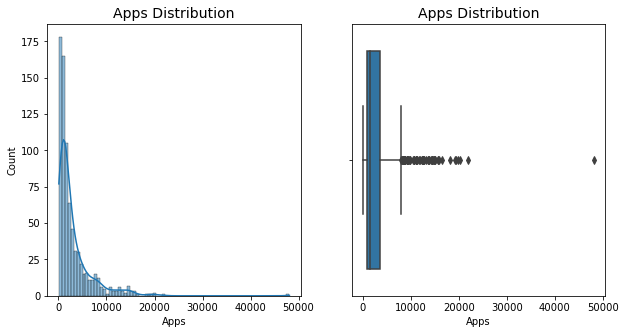

In [26]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig1=sns.histplot(student.Apps, kde=True, ax=axs[0])
fig1.set_title("Apps Distribution",fontsize=14)
fig1=sns.boxplot(x='Apps',data=student, ax=axs[1])
fig1.set_title("Apps Distribution",fontsize=14)

#### Observations:
    * For Univariate Analysis of Apps we are using histplot and boxplot to find information or patterns in the data.
    * The Boxplot of Apps variable seems to have outliers. The distribution of the data is also skewed. We also understand that each college or university offers application in the range 3000 to 5000. The maximum application seems to be around 50,000.

### Accept Distribution :

Text(0.5, 1.0, 'Accept Distribution')

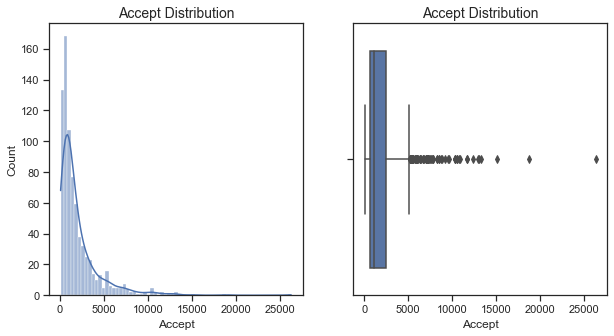

In [86]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig2=sns.histplot(student.Accept, kde=True, ax=axs[0])
fig2.set_title("Accept Distribution",fontsize=14)
fig2=sns.boxplot(x='Accept',data=student, ax=axs[1])
fig2.set_title("Accept Distribution",fontsize=14)

#### Observations :

    * The accept variable seems to have outliers
    * The above plot shows that the majority of applications accepted from each university are in the range from 70 to 1500.
    * The Accept variable seems to be positively skewed.

### Enroll Distribution:

Text(0.5, 1.0, 'Enroll Distribution')

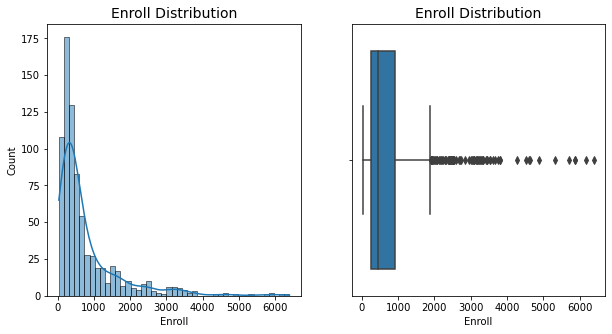

In [28]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig3=sns.histplot(student.Enroll, kde=True, ax=axs[0])
fig3.set_title("Enroll Distribution",fontsize=14)
fig3=sns.boxplot(x='Enroll',data=student, ax=axs[1])
fig3.set_title("Enroll Distribution",fontsize=14)

### observations:

   * The boxplot of the Enroll variable also have outliers.
   * The distribution of the data is positively skewed.
   * From the histplot we can understand majority of the colleges have enrolled students in the range from 200 to 500 students.
    

### Top10perc Distribution :

Text(0.5, 1.0, 'Top10perc Distribution')

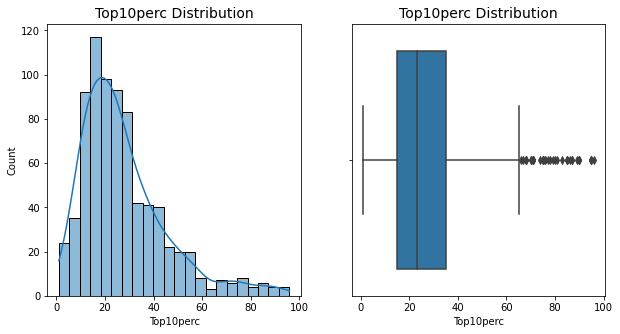

In [29]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig4=sns.histplot(student.Top10perc, kde=True, ax=axs[0])
fig4.set_title("Top10perc Distribution",fontsize=14)
fig4=sns.boxplot(x='Top10perc',data=student, ax=axs[1])
fig4.set_title("Top10perc Distribution",fontsize=14)

#### Observation :
 * The Boxplot of the students from Top 10 percentage of higher secondary class seems to have outliers.
 * The distribution seems to be positively skewed.
 * There is a good amount of intake about 30 to 50 students from top 10 percentage of higher secondary class.

### Top25perc Distribution :

Text(0.5, 1.0, 'Top25perc Distribution')

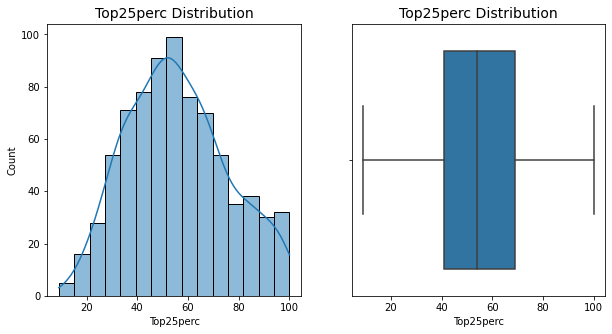

In [30]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig5=sns.histplot(student.Top25perc, kde=True, ax=axs[0])
fig5.set_title("Top25perc Distribution",fontsize=14)
fig5=sns.boxplot(x='Top25perc',data=student, ax=axs[1])
fig5.set_title("Top25perc Distribution",fontsize=14)

#### Observations :

* The Boxplot for the top 25% has no outliers.
* The distribution is almost normally distributed.
* Majority of the students are from top 25% of higher secondary school.

### Full Time Undergraduate :

Text(0.5, 1.0, 'F.Undergrad Distribution')

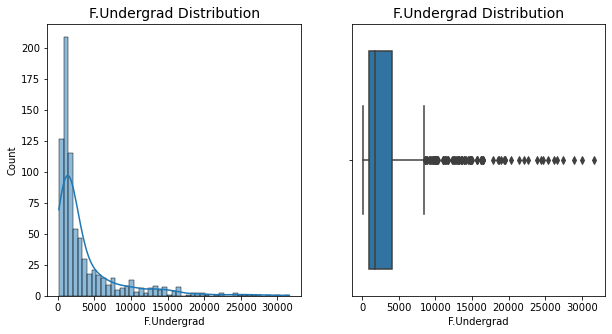

In [31]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig6=sns.histplot(student['F.Undergrad'], kde=True, ax=axs[0])
fig6.set_title("F.Undergrad Distribution",fontsize=14)
fig6=sns.boxplot(x='F.Undergrad',data=student, ax=axs[1])
fig6.set_title("F.Undergrad Distribution",fontsize=14)

#### Observations :

* The Boxplot of full time Undergraduates have outliers.
* The distribution of the data is positively skewed.
* In the range about 3000 to 5000 there are full time graduates studying in all the university.

### Part Time Undergraduate :

Text(0.5, 1.0, 'P.Undergrad Distribution')

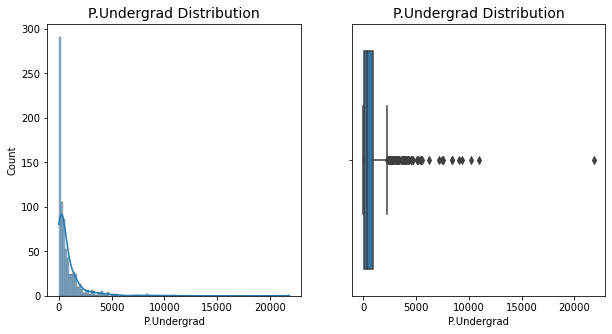

In [32]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig7=sns.histplot(student['P.Undergrad'], kde=True, ax=axs[0])
fig7.set_title("P.Undergrad Distribution",fontsize=14)
fig7=sns.boxplot(x='P.Undergrad',data=student, ax=axs[1])
fig7.set_title("P.Undergrad Distribution",fontsize=14)

#### Observations :

* The Boxplot of Part time graduates have outliers.
* The distribution of the data is positively skewed.
* In the range about 1000 to 3000 they are part time graduates studying in all the university.

### OUTSTATE :

Text(0.5, 1.0, 'Outstate Distribution')

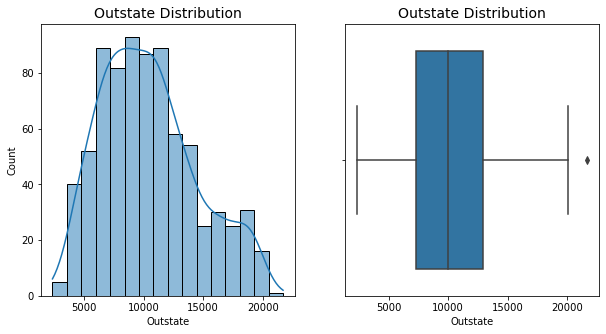

In [33]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig8=sns.histplot(student['Outstate'], kde=True, ax=axs[0])
fig8.set_title("Outstate Distribution",fontsize=14)
fig8=sns.boxplot(x='Outstate',data=student, ax=axs[1])
fig8.set_title("Outstate Distribution",fontsize=14)

### Observations :

* The Boxplot of Outstate also has outliers.
* The distribution is almost normally distributed.

### ROOM BOARD :

Text(0.5, 1.0, 'Room.Board Distribution')

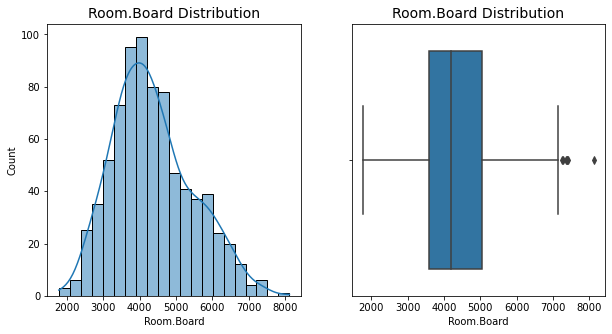

In [34]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig9=sns.histplot(student['Room.Board'], kde=True, ax=axs[0])
fig9.set_title("Room.Board Distribution",fontsize=14)
fig9=sns.boxplot(x='Room.Board',data=student, ax=axs[1])
fig9.set_title("Room.Board Distribution",fontsize=14)

### Observations :
 
* The Room Board has very few outliers.
* The distribution is normally distributed.

## BOOKS :

Text(0.5, 1.0, 'Books Distribution')

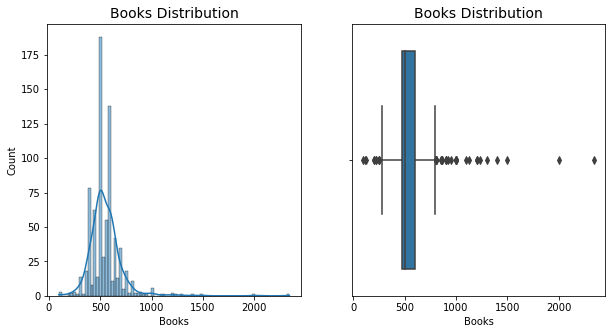

In [35]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig10=sns.histplot(student['Books'], kde=True, ax=axs[0])
fig10.set_title("Books Distribution",fontsize=14)
fig10=sns.boxplot(x='Books',data=student, ax=axs[1])
fig10.set_title("Books Distribution",fontsize=14)

### Observations :

* The Boxplot of Books has Outliers.
* The distribution seems to be bimodal.
* The Cost of books per student seems to be in the range of 100 to 500.

## PERSONAL :

Text(0.5, 1.0, 'Personal Distribution')

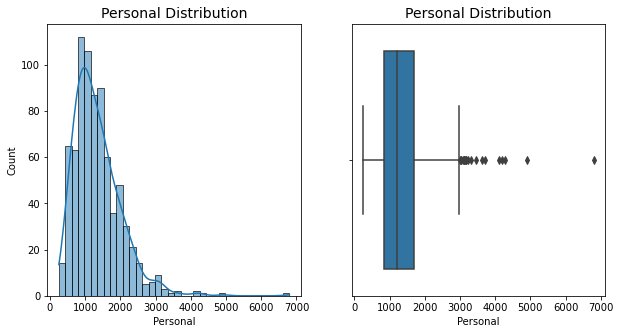

In [36]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig11=sns.histplot(student['Personal'], kde=True, ax=axs[0])
fig11.set_title("Personal Distribution",fontsize=14)
fig11=sns.boxplot(x='Personal',data=student, ax=axs[1])
fig11.set_title("Personal Distribution",fontsize=14)

### Observations :

* The Boxplot of Personal expenses have outliers.
* Some students Personal expenses are more than other students.
* The distribution seems to be positively skewed.

### PHD :

Text(0.5, 1.0, 'PhD Distribution')

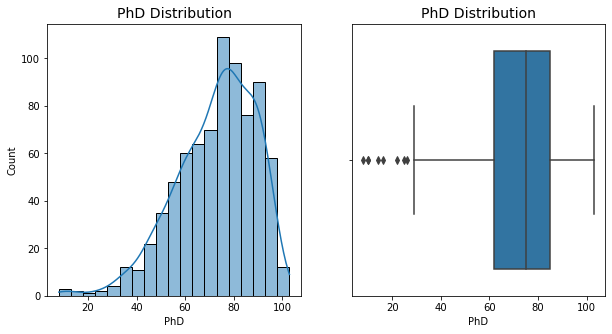

In [37]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig12=sns.histplot(student['PhD'], kde=True, ax=axs[0])
fig12.set_title("PhD Distribution",fontsize=14)
fig12=sns.boxplot(x='PhD',data=student, ax=axs[1])
fig12.set_title("PhD Distribution",fontsize=14)

### Observations:

* The Boxplot of PhD has Outliers.
* The distribution seems to be negatively skewed.

### TERMINAL :

Text(0.5, 1.0, 'Terminal Distribution')

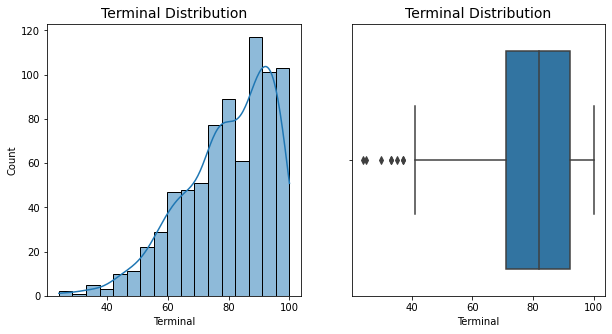

In [38]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig13=sns.histplot(student['Terminal'], kde=True, ax=axs[0])
fig13.set_title("Terminal Distribution",fontsize=14)
fig13=sns.boxplot(x='Terminal',data=student, ax=axs[1])
fig13.set_title("Terminal Distribution",fontsize=14)

### Observations:

* The Boxplot of Terminal seems to have outliers in the dataset.
* The distribution for Terminal seems to be negatively skewed.

## SF RATIO :

Text(0.5, 1.0, 'S.F.Ratio Distribution')

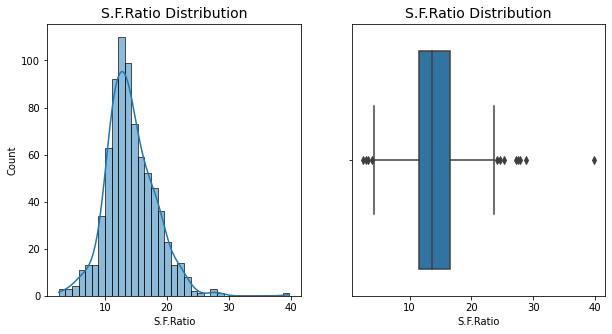

In [39]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig14=sns.histplot(student['S.F.Ratio'], kde=True, ax=axs[0])
fig14.set_title("S.F.Ratio Distribution",fontsize=14)
fig14=sns.boxplot(x='S.F.Ratio',data=student, ax=axs[1])
fig14.set_title("S.F.Ratio Distribution",fontsize=14)

### Observations :

* The S.F.Ratio also has outliers.
* S.F. Ratio is almost normally distributed.
* The student faculty ratio is almost same in all the university and college.

### PERCI ALUMINI:

Text(0.5, 1.0, 'perc.alumni Distribution')

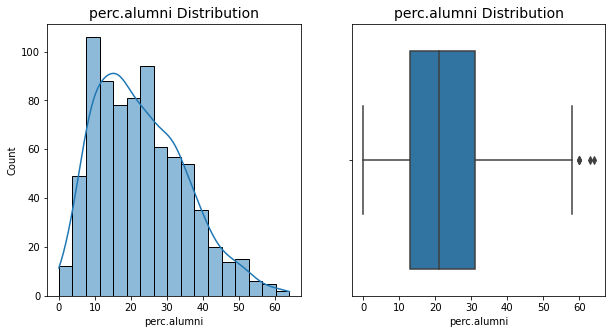

In [40]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig15=sns.histplot(student['perc.alumni'], kde=True, ax=axs[0])
fig15.set_title("perc.alumni Distribution",fontsize=14)
fig15=sns.boxplot(x='perc.alumni',data=student, ax=axs[1])
fig15.set_title("perc.alumni Distribution",fontsize=14)

### Observations :

* The percentage of Alumini boxplot seems to have Outliers.
* The distribution is almost normally distributed.

### EXPENDITURE :

Text(0.5, 1.0, 'Expend Distribution')

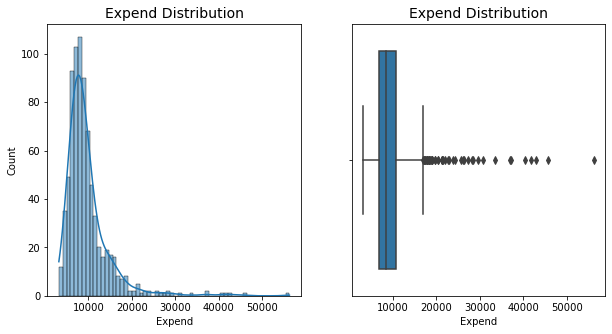

In [41]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig16=sns.histplot(student['Expend'], kde=True, ax=axs[0])
fig16.set_title("Expend Distribution",fontsize=14)
fig16=sns.boxplot(x='Expend',data=student, ax=axs[1])
fig16.set_title("Expend Distribution",fontsize=14)

### Observations:

* The Expenditure variable also has Outliers in the dataset.
* The distribution of the Expenditure variable is positively skewed.

### GRAD RATE :

Text(0.5, 1.0, 'Grad.Rate Distribution')

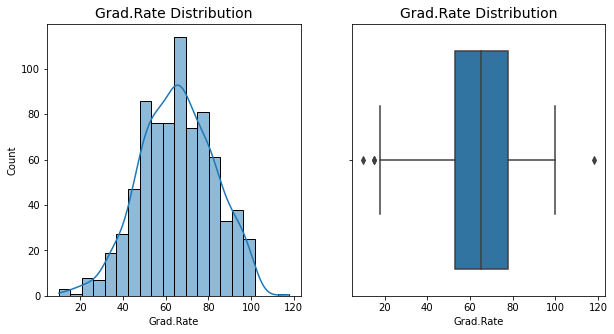

In [42]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig17=sns.histplot(student['Grad.Rate'], kde=True, ax=axs[0])
fig17.set_title("Grad.Rate Distribution",fontsize=14)
fig17=sns.boxplot(x='Grad.Rate',data=student, ax=axs[1])
fig17.set_title("Grad.Rate Distribution",fontsize=14)

### Observations :

* The Boxplot of the Graduation has Outliers in the dataset.
* The Graduation rate among the students in all the university is above 60 %.
* The distribution is normally distributed.

### Let us define a function 'univariateAnalysis_category' to display information as part of univariate analysis of categorical variables.
### The function should display the frequency of all the levels within the field and display a frequency plot

In [43]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")


In [44]:
df_cat = df.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['Education', 'Occupation']

Details of Education
----------------------------------------------------------------
 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64


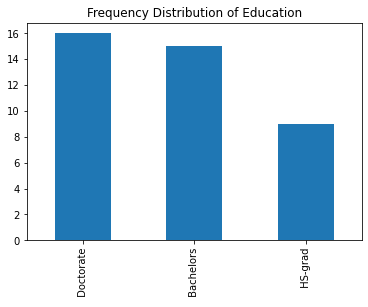

       
Details of Occupation
----------------------------------------------------------------
 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64


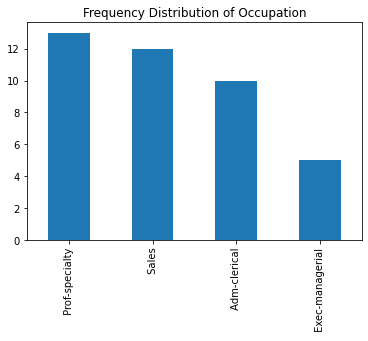

In [45]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

# MULTIVARIATE ANALYSIS :

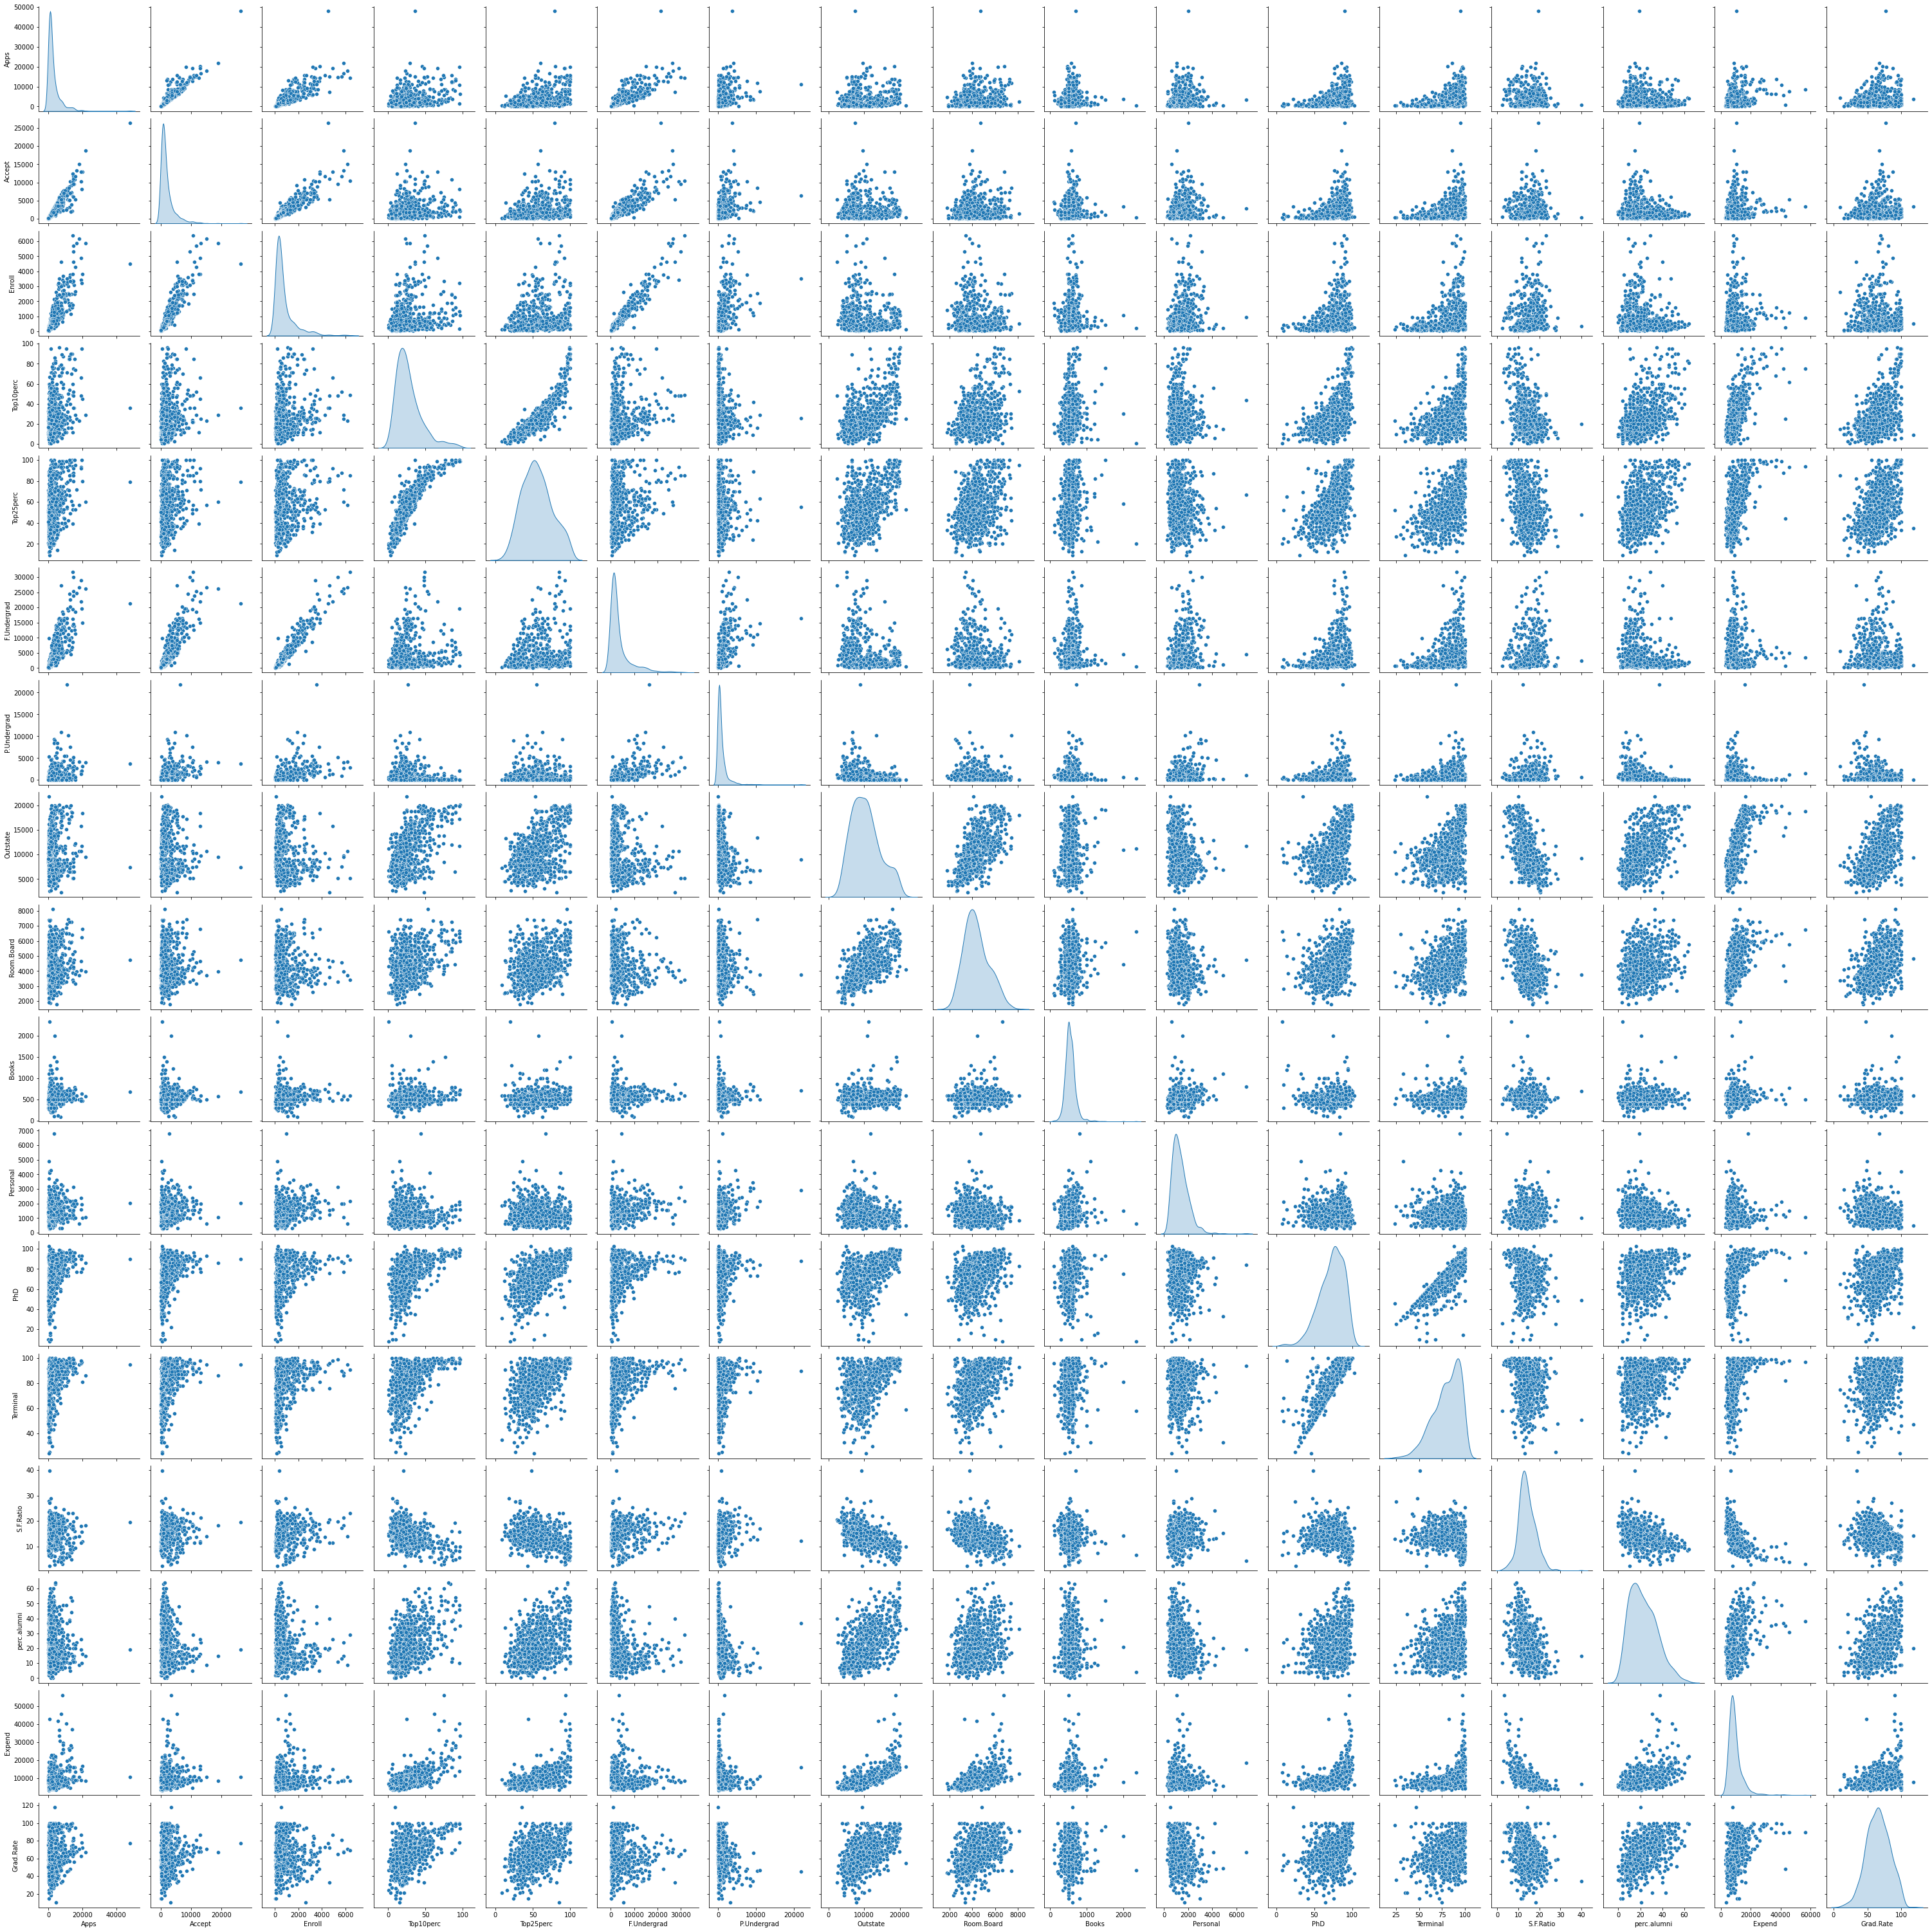

In [46]:
sns.pairplot(student, diag_kind='kde')

### Observation :

The Pair Plot helps us to understand the relationship between all the numerical values in the dataset. On comparing all the variables with each other we could undestand the patterns.The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data.

In [87]:
corr = student.corr()
round(corr,3)

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000   0.943   0.847      0.339      0.352        0.814   
Accept       0.943   1.000   0.912      0.192      0.247        0.874   
Enroll       0.847   0.912   1.000      0.181      0.227        0.965   
Top10perc    0.339   0.192   0.181      1.000      0.892        0.141   
Top25perc    0.352   0.247   0.227      0.892      1.000        0.199   
F.Undergrad  0.814   0.874   0.965      0.141      0.199        1.000   
P.Undergrad  0.398   0.441   0.513     -0.105     -0.054        0.571   
Outstate     0.050  -0.026  -0.155      0.562      0.489       -0.216   
Room.Board   0.165   0.091  -0.040      0.371      0.331       -0.069   
Books        0.133   0.114   0.113      0.119      0.116        0.116   
Personal     0.179   0.201   0.281     -0.093     -0.081        0.317   
PhD          0.391   0.356   0.331      0.532      0.546        0.318   
Terminal     0.369   0.338   0.308      0.491      0.525        0.300   
S.F.Ratio    0.096   0.176   0.237     -0.385     -0.295        0.280   
perc.alumni -0.090  -0.160  -0.181      0.455      0.418       -0.229   
Expend       0.260   0.125   0.064      0.661      0.527        0.019   
Grad.Rate    0.147   0.067  -0.022      0.495      0.477       -0.079   

             P.Undergrad  Outstate  Room.Board  Books  Personal    PhD  \
Apps               0.398     0.050       0.165  0.133     0.179  0.391   
Accept             0.441    -0.026       0.091  0.114     0.201  0.356   
Enroll             0.513    -0.155      -0.040  0.113     0.281  0.331   
Top10perc         -0.105     0.562       0.371  0.119    -0.093  0.532   
Top25perc         -0.054     0.489       0.331  0.116    -0.081  0.546   
F.Undergrad        0.571    -0.216      -0.069  0.116     0.317  0.318   
P.Undergrad        1.000    -0.254      -0.061  0.081     0.320  0.149   
Outstate          -0.254     1.000       0.654  0.039    -0.299  0.383   
Room.Board        -0.061     0.654       1.000  0.128    -0.199  0.329   
Books              0.081     0.039       0.128  1.000     0.179  0.027   
Personal           0.320    -0.299      -0.199  0.179     1.000 -0.011   
PhD                0.149     0.383       0.329  0.027    -0.011  1.000   
Terminal           0.142     0.408       0.375  0.100    -0.031  0.850   
S.F.Ratio          0.233    -0.555      -0.363 -0.032     0.136 -0.131   
perc.alumni       -0.281     0.566       0.272 -0.040    -0.286  0.249   
Expend            -0.084     0.673       0.502  0.112    -0.098  0.433   
Grad.Rate         -0.257     0.571       0.425  0.001    -0.269  0.305   

             Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Apps            0.369      0.096       -0.090   0.260      0.147  
Accept          0.338      0.176       -0.160   0.125      0.067  
Enroll          0.308      0.237       -0.181   0.064     -0.022  
Top10perc       0.491     -0.385        0.455   0.661      0.495  
Top25perc       0.525     -0.295        0.418   0.527      0.477  
F.Undergrad     0.300      0.280       -0.229   0.019     -0.079  
P.Undergrad     0.142      0.233       -0.281  -0.084     -0.257  
Outstate        0.408     -0.555        0.566   0.673      0.571  
Room.Board      0.375     -0.363        0.272   0.502      0.425  
Books           0.100     -0.032       -0.040   0.112      0.001  
Personal       -0.031      0.136       -0.286  -0.098     -0.269  
PhD             0.850     -0.131        0.249   0.433      0.305  
Terminal        1.000     -0.160        0.267   0.439      0.290  
S.F.Ratio      -0.160      1.000       -0.403  -0.584     -0.307  
perc.alumni     0.267     -0.403        1.000   0.418      0.491  
Expend          0.439     -0.584        0.418   1.000      0.390  
Grad.Rate       0.290     -0.307        0.491   0.390      1.000

### CORRELATION HEATMAP :

<AxesSubplot:>

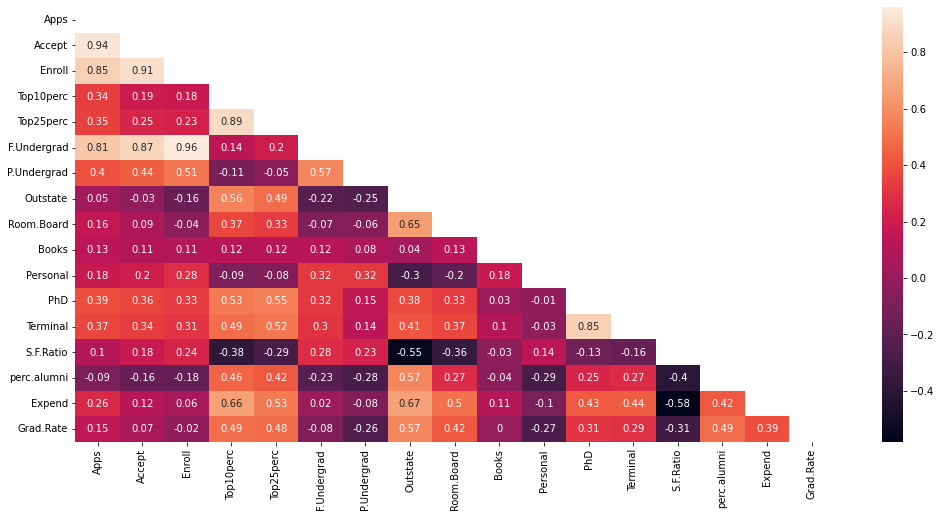

In [48]:
fig_dims = (17, 8)
fig = plt.subplots(figsize=fig_dims)
mask = np.triu(np.ones_like(corr, dtype=bool)) 
sns.heatmap(round(corr,2), annot=True, mask=mask)

### Observations :
This Heat map gives us the correlation between two numerical values.There are considerable number of features that are highly correlated.

* We could understand the application variable is higly positively correlated with application accepted, students enrolled and full time graduates.So this relationship gives the insights on when student submits the application it is accepted and the student is enrolled as full time Graduates.
* The application with top 10 percent and 25 percent of higher secondary class, Outstate, Room Board, Books, Personal, PhD,Terminal, S.F.Ratio, expenditure and Graduation ratio are positively correlated.
* 'Enroll' shows high correlation with 'Full Time UnderGraduate'.
* We can find negative correlation between application and percentage of alumini. This shows that not all students are part of alumni of their college or university.
* 'Top10perc' shows high correlation with 'Top25perc'.
* 'F.Undergraduate' shows less correlation with'Expend'.

# 2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.

#### Often the variables of the data set are of different scales i.e. one variable is in millions and other in only 100. For e.g. in our data set 'Apps','Enroll' is having positive integer values whereas S.F.Ration is having decimal values. Since the data in these variables are of different scales, it is tough to compare these variables.

#### Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. It helps to normalize the data within a particular range.Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.

####  In this method, we convert variables with different scales of measurements into a single scale.

#### zscore normalizes the data using the formula (x-mean)/standard deviation. Zscore tells us how many standard deviation is the point away from the mean. It also allows us to determine how usual or unusual a data point is in a distribution.

#### We will be doing this only for the numerical variables.

In [49]:
student_1 = student.drop(['Names'], axis =1)

In [50]:
from scipy.stats import zscore
student_z=student_1.apply(zscore)
student_z.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

####  Now we can observe that all the variables have been normalized and scaled in same scale.

In [51]:
student_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    float64
 1   Accept       777 non-null    float64
 2   Enroll       777 non-null    float64
 3   Top10perc    777 non-null    float64
 4   Top25perc    777 non-null    float64
 5   F.Undergrad  777 non-null    float64
 6   P.Undergrad  777 non-null    float64
 7   Outstate     777 non-null    float64
 8   Room.Board   777 non-null    float64
 9   Books        777 non-null    float64
 10  Personal     777 non-null    float64
 11  PhD          777 non-null    float64
 12  Terminal     777 non-null    float64
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    float64
 15  Expend       777 non-null    float64
 16  Grad.Rate    777 non-null    float64
dtypes: float64(17)
memory usage: 103.3 KB


# 2.3 Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].

Covariance is when two variables vary with each other, whereas Correlation is when the change in one variable results in the change in another variable.

In [52]:
cov_matrix = np.cov(student_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [53]:
student_z_corr = student_z.corr()
student_z_corr

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

#### Observations :

* Covariance indicates the direction of the linear relationship between variables. Correlation measures both the strength and direction of the linear relationship between two variables.
* Both Covariance and Correlation Matrix measures the relationship and the dependency between two variables.
* The Correlation matrix before scaling and after scaling remains the same.
* From the above table we can observe the variable which are highly positively correlated and  variable which are highly negatively correlated.
* We can see that application, acceptance, enrollment and fulltime graduates are highly positively correlated.
* Top 10 percentage and Top 25 percentage are highly positively correlated.

# 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]

### Checking the data before scaling

<AxesSubplot:>

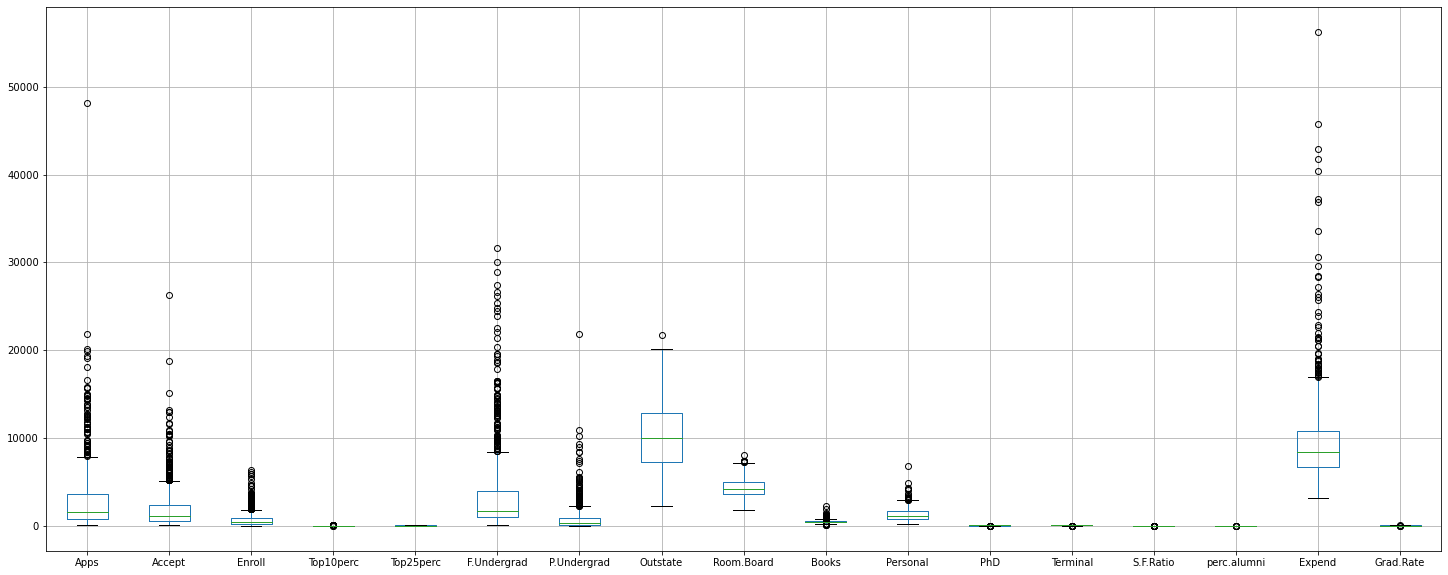

In [54]:
student.boxplot(figsize=(25,10))

### Checking the dataset after scaling

<AxesSubplot:>

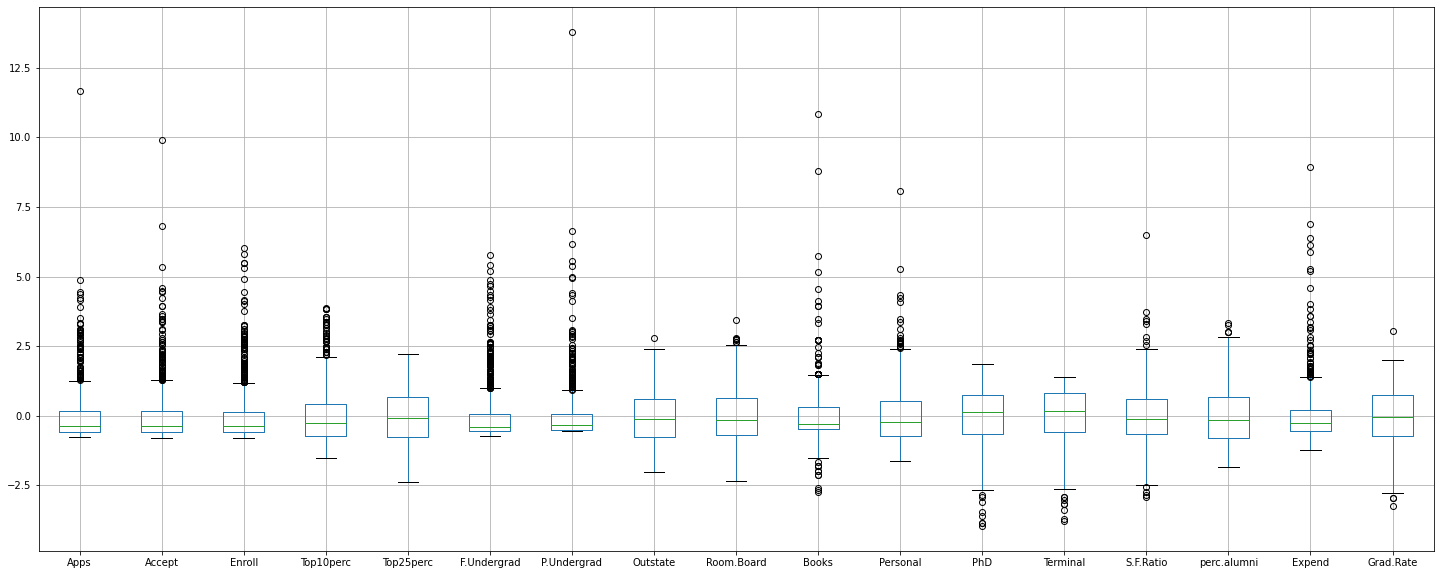

In [55]:
student_z.boxplot(figsize=(25,10))

### Inference :
The Outliers are still present in the dataset.

### Reason :
Scaling does not remove Outliers. Scaling scales the values on a Z score distribution. There are many methods to remove Outliers. For example, we can consider taking 3 standard deviations as outliers or either we can remove them or impute them with IQR values.

# 2.5 Extract the eigenvalues and eigenvectors.[Using Sklearn PCA Print Both]

In [56]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.48765602e-01  3.31598227e-01 -6.30921033e-02  2.81310530e-01
  -5.74140964e-03 -1.62374420e-02 -4.24863486e-02 -1.03090398e-01
  -9.02270802e-02  5.25098025e-02 -3.58970400e-01  4.59139498e-01
  -4.30462074e-02  1.33405806e-01 -8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01 -1.01249056e-01  2.67817346e-01
  -5.57860920e-02  7.53468452e-03 -1.29497196e-02 -5.62709623e-02
  -1.77864814e-01  4.11400844e-02  5.43427250e-01 -5.18568789e-01
   5.84055850e-02 -1.45497511e-01 -3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01 -8.29855709e-02  1.61826771e-01
   5.56936353e-02 -4.25579803e-02 -2.76928937e-02  5.86623552e-02
  -1.28560713e-01  3.44879147e-02 -6.09651110e-01 -4.04318439e-01
   6.93988831e-02  2.95896092e-02  8.56967180e-02  4.44638207e-01
   1.11431545e-02]
 [-3.54273947e-01 -8.24118211e-02  3.50555339e-02 -5.15472524e-02
   3.95434345e-01 -5.26927980e-02 -1.61332069e-01 -1.22678028e-01
 

# 2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [57]:
#Apply PCA taking all features
pca = PCA(n_components=17)
X_pca= pca.fit_transform(student_z)

In [58]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [59]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

In [60]:
student_z.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [61]:
#Extract eigen vectors
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

PCA is performed and it is exported into a data frame. After PCA the multi collinearity is highly reduced.

In [64]:
df_comp = pd.DataFrame(pca.components_,columns=list(student_z))
df_comp

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.248766  0.207602  0.176304   0.354274   0.344001     0.154641   
1  0.331598  0.372117  0.403724  -0.082412  -0.044779     0.417674   
2 -0.063092 -0.101249 -0.082986   0.035056  -0.024148    -0.061393   
3  0.281310  0.267817  0.161827  -0.051547  -0.109767     0.100412   
4  0.005742  0.055786 -0.055694  -0.395434  -0.426534    -0.043454   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.026443  0.294736    0.249030  0.064758 -0.042529  0.318313  0.317056   
1     0.315088 -0.249644   -0.137809  0.056342  0.219929  0.058311  0.046429   
2     0.139682  0.046599    0.148967  0.677412  0.499721 -0.127028 -0.066038   
3    -0.158558  0.131291    0.184996  0.087089 -0.230711 -0.534725 -0.519443   
4     0.302385  0.222532    0.560919 -0.127289 -0.222311  0.140166  0.204720   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.176958     0.205082  0.318909   0.252316  
1   0.246665    -0.246595 -0.131690  -0.169241  
2  -0.289848    -0.146989  0.226744  -0.208065  
3  -0.161189     0.017314  0.079274   0.269129  
4  -0.079388    -0.216297  0.075958  -0.109268

# 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

In [65]:
print('The Linear eq of 1st component: ')
for i in range(0,student_z.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[0][i],3),student_z.columns[i]),end=' + ')

The Linear eq of 1st component: 
0.249 * Apps + 0.208 * Accept + 0.176 * Enroll + 0.354 * Top10perc + 0.344 * Top25perc + 0.155 * F.Undergrad + 0.026 * P.Undergrad + 0.295 * Outstate + 0.249 * Room.Board + 0.065 * Books + -0.043 * Personal + 0.318 * PhD + 0.317 * Terminal + -0.177 * S.F.Ratio + 0.205 * perc.alumni + 0.319 * Expend + 0.252 * Grad.Rate + 

# 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [66]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 32.0206282 ,  58.36084263,  65.26175919,  71.18474841,
        76.67315352,  81.65785448,  85.21672597,  88.67034731,
        91.78758099,  94.16277251,  96.00419883,  97.30024023,
        98.28599436,  99.13183669,  99.64896227,  99.86471628,
       100.        ])

### Adding the Eigenvalues we will get sum of 100.
To decide the Optimum number of Principle Components
* Check for cumulative variance up to 90%
* The incremental value between the components should not be less than five percent.
* So based on this we can decide the optimum number of principal components as 6, because after this the incremental values is less than 5%.

So, we select 5 principal component for this case study.

In [88]:
pca = PCA(n_components=5)
X_pca= pca.fit_transform(student_z)

In [89]:
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.0630921 , -0.10124906, -0.08298557,  0.03505553, -0.02414794,
        -0.06139297,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131051,  0.26781737,  0.16182679, -0.05154724, -0.10976654,
         0.1004123 , -0.15855848,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.0792735 

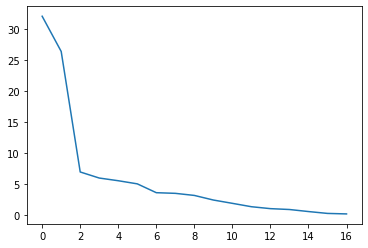

In [67]:
plt.plot(var_exp)

### Observations :

* The first Components explain 32.02% variance in data.
* The first two Components explain 58.36% variance in data.
* The first three Components explain 65.26% variance in data.
* The first four Components explain 71.18% variance in data.
* The first five Components explain 76.67% variance in data.

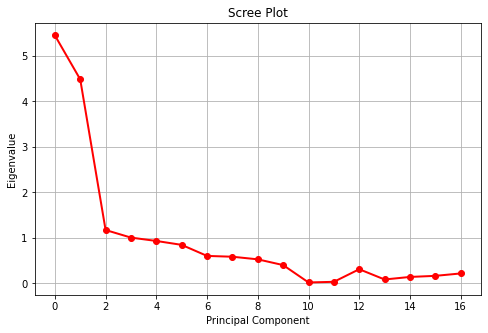

In [68]:
fig = plt.figure(figsize=(8,5))
sing_vals = range(student_z.shape[1])
plt.plot(sing_vals, eig_vals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

The Eigenvectors or PC for this case study is five. We can understand how much each variables contributes to the Principle Components.With this Eigen vectors we can understand which variable has more weightage and influences the dataset in Principle Components. The PCA reduces the multi collinearity and with this reduced collinearity  we can improve efficiency scores.

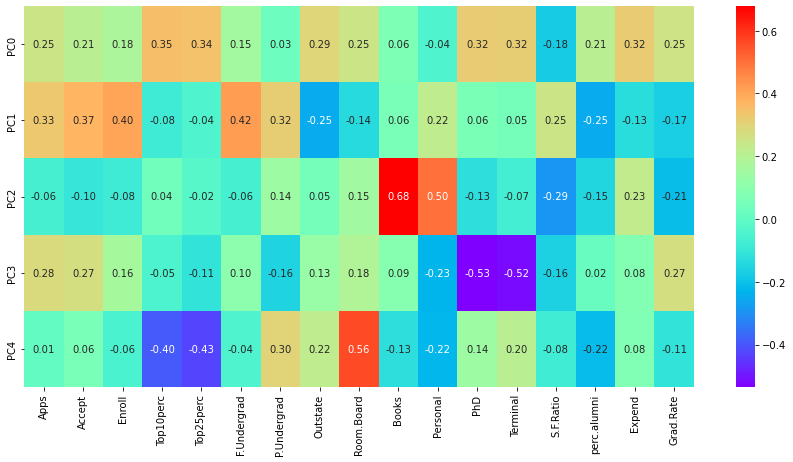

In [69]:
plt.figure(figsize= (15,7))
sns.heatmap(df_comp, cmap= 'rainbow', annot = True, fmt = '.2f', yticklabels= ['PC0', 'PC1', 'PC2', 'PC3','PC4'])
plt.show()

# 2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

This business case study is about education dataset which contain the names of various colleges, which has various details of colleges and university. To understand more about the dataset we perform univariate analysis and multivariate analysis which gives us the understanding about the variables. From analysis we can understand the distribution of the dataset, skew, and patterns in the dataset. From multivariate analysis we can understand the correlation of variables. Inference of multivariate analysis shows we can understand multiple variables highly correlated with each other. The scaling helps the dataset to standardize the variable in one scale. Outliers are imputed using IQR values once the values are imputed we can perform PCA. The principal component analysis is used reduce the multicollinearity between the variables. Depending on the variance of the dataset we can reduce the PCA components. The PCA components for this business case is 5 where we could understand the maximum variance of the dataset. Using the components we can now understand the reduced multicollinearity in the dataset